In [1]:
import pandas as pd
import matplotlib.pyplot as plt
birds = pd.read_csv('birds.csv')
birds.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


<AxesSubplot:>

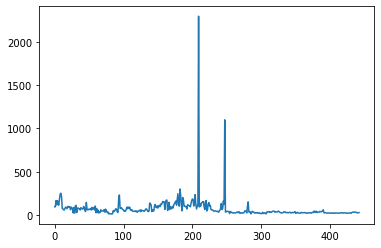

In [3]:
wingspan = birds['MaxWingspan']
wingspan.plot()

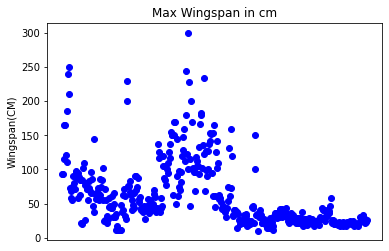

In [10]:
plt.title('Max Wingspan in cm')
plt.ylabel('Wingspan(CM)')
plt.tick_params(axis ='both', which = 'both', labelbottom = False,bottom = False)

for i in range(len(birds)):
    x = birds['Name'][i]
    y= birds['MaxWingspan'][i]
    if birds['Name'][i] not in ['Bald eagle', 'Prairie falcon']:
        plt.plot(x,y,'bo')

plt.show()

<AxesSubplot:title={'center':'Birds of Minnesota'}, xlabel='Category'>

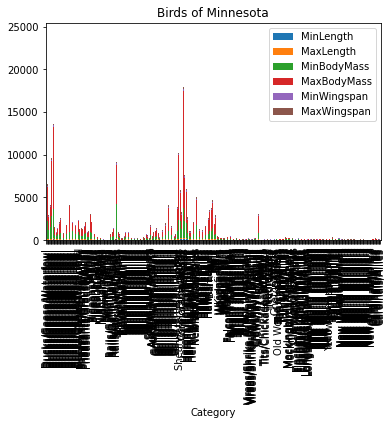

In [13]:
#bar chart of the data with x being 'Category', and title being 'Birds of Minnesota'
birds.plot(kind='bar', x='Category',stacked = True, title='Birds of Minnesota')

<AxesSubplot:>

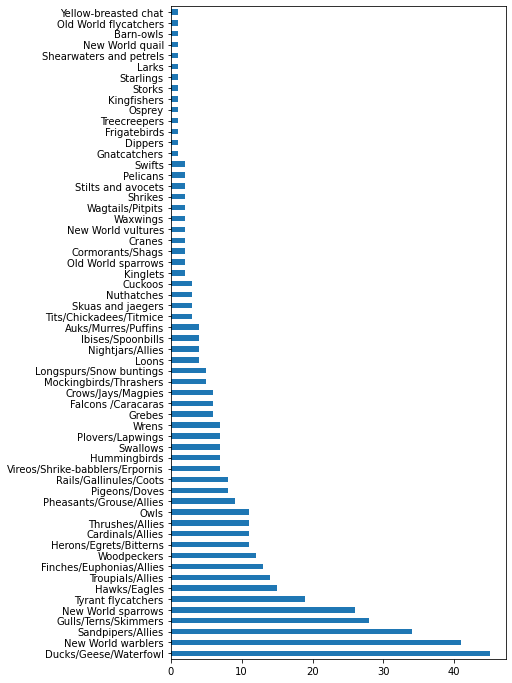

In [14]:
category_counts = birds.value_counts(birds['Category'].values, sort = True)
plt.rcParams['figure.figsize'] = (6,12)
category_counts.plot.barh()


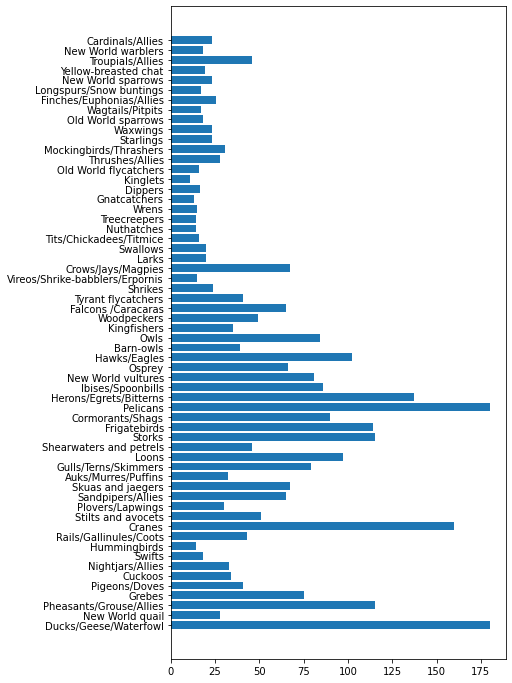

In [15]:
maxlength = birds['MaxLength']
plt.barh(y=birds['Category'], width=maxlength)
plt.rcParams['figure.figsize'] = (6,12)
plt.show()


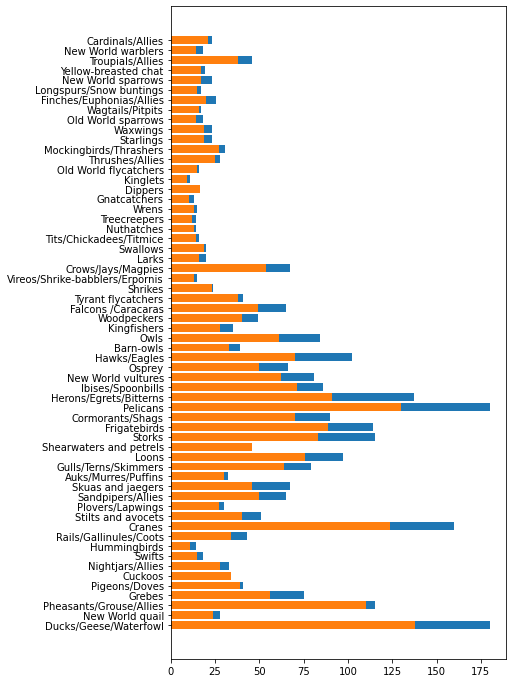

In [16]:
minLength = birds['MinLength']
maxlength = birds['MaxLength']
category = birds['Category']

plt.barh(category, maxlength)
plt.barh(category, minLength)
plt.show()

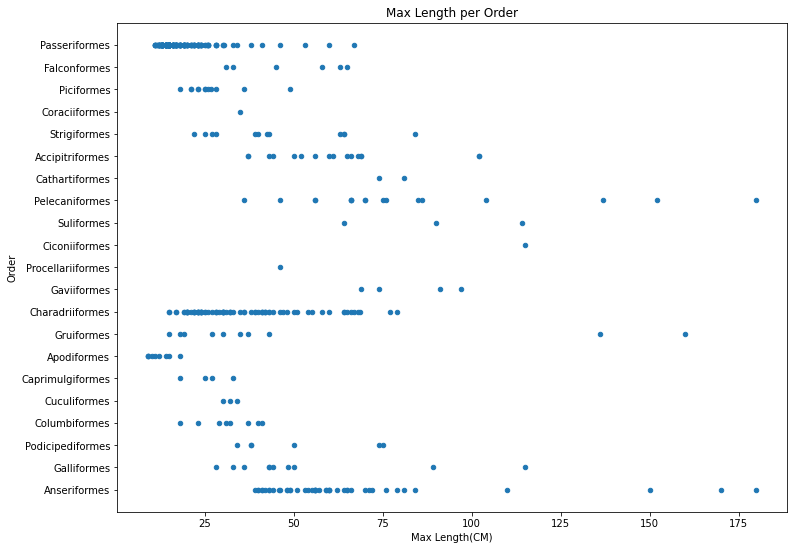

In [17]:
birds.plot(kind='scatter',x='MaxLength',y='Order',figsize=(12,9))

plt.title('Max Length per Order')
plt.xlabel('Max Length(CM)')
plt.ylabel('Order')
plt.show()

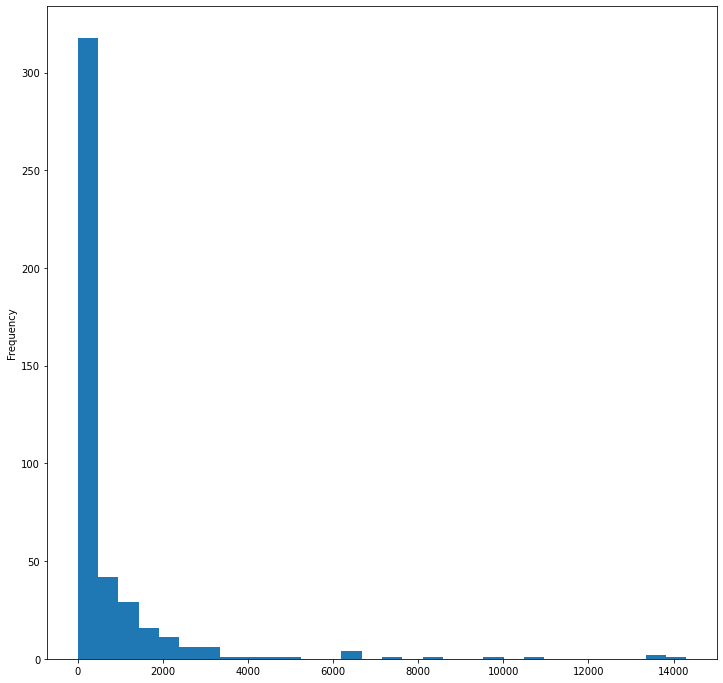

In [19]:
birds['MaxBodyMass'].plot(kind='hist',bins=30, figsize = (12,12))
plt.show()

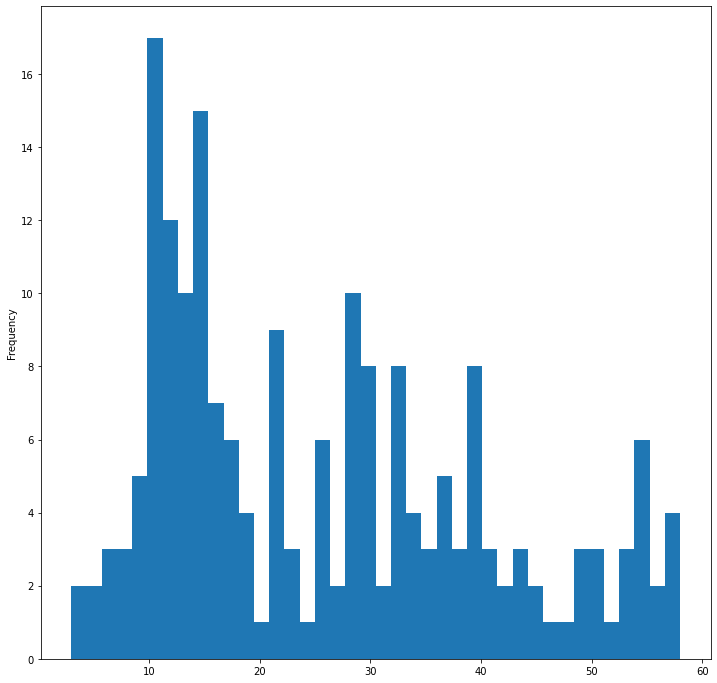

In [20]:
filteredBirds = birds[(birds['MaxBodyMass'] > 1) & (birds['MaxBodyMass'] < 60)]
filteredBirds['MaxBodyMass'].plot(kind='hist',bins=40, figsize = (12,12))
plt.show()

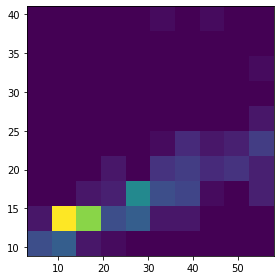

In [24]:
x = filteredBirds['MaxBodyMass']
y = filteredBirds['MaxLength']

fig, ax = plt.subplots(tight_layout=True, figsize=(4,4))
hist = ax.hist2d(x, y, bins=10)

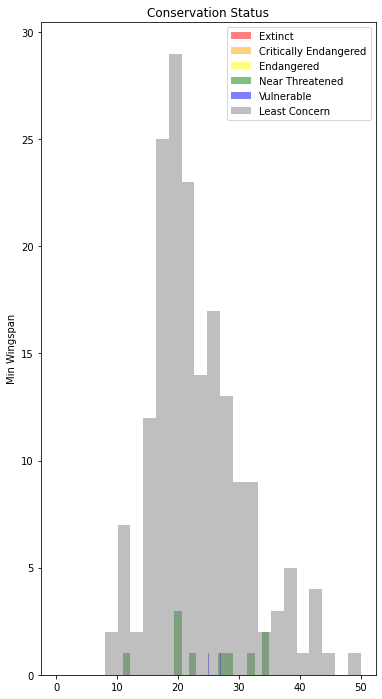

In [25]:
x1 = filteredBirds.loc[filteredBirds.ConservationStatus=='EX', 'MinWingspan']
x2 = filteredBirds.loc[filteredBirds.ConservationStatus=='CR', 'MinWingspan']
x3 = filteredBirds.loc[filteredBirds.ConservationStatus=='EN', 'MinWingspan']
x4 = filteredBirds.loc[filteredBirds.ConservationStatus=='NT', 'MinWingspan']
x5 = filteredBirds.loc[filteredBirds.ConservationStatus=='VU', 'MinWingspan']
x6 = filteredBirds.loc[filteredBirds.ConservationStatus=='LC', 'MinWingspan']

kwargs = dict(alpha=0.5, bins=20)

plt.hist(x1, **kwargs, color='red', label='Extinct')
plt.hist(x2, **kwargs, color='orange', label='Critically Endangered')
plt.hist(x3, **kwargs, color='yellow', label='Endangered')
plt.hist(x4, **kwargs, color='green', label='Near Threatened')
plt.hist(x5, **kwargs, color='blue', label='Vulnerable')
plt.hist(x6, **kwargs, color='gray', label='Least Concern')

plt.gca().set(title='Conservation Status', ylabel='Min Wingspan')
plt.legend();

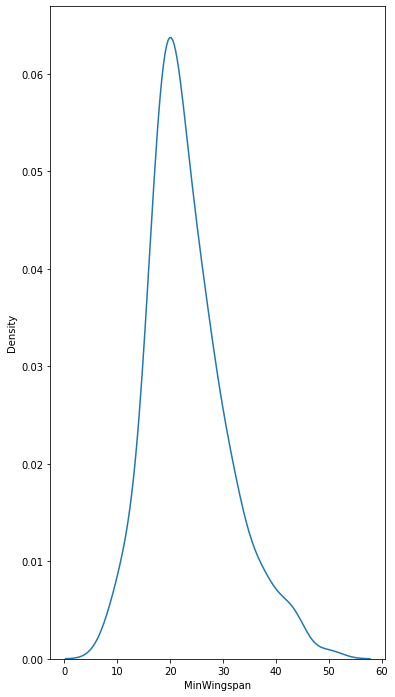

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(filteredBirds['MinWingspan'])
plt.show()

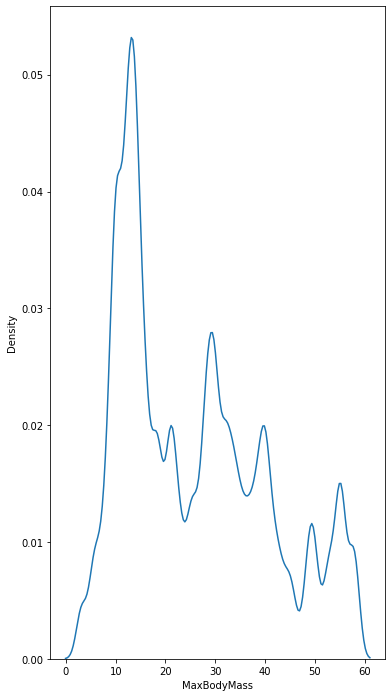

In [29]:
sns.kdeplot(filteredBirds['MaxBodyMass'], bw_adjust=.2)
plt.show()

C:\Users\cwalinskid\.conda\envs\packagesgisOPENsource\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\cwalinskid\.conda\envs\packagesgisOPENsource\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='MaxBodyMass', ylabel='Density'>

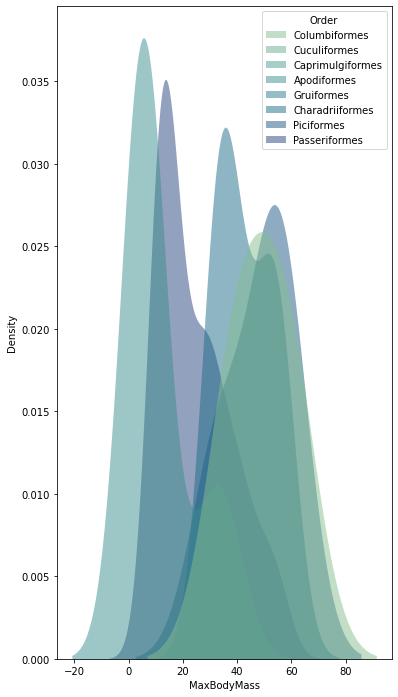

In [30]:
sns.kdeplot(
   data=filteredBirds, x="MaxBodyMass", hue="Order",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

C:\Users\cwalinskid\.conda\envs\packagesgisOPENsource\lib\site-packages\seaborn\distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='MinLength', ylabel='MaxLength'>

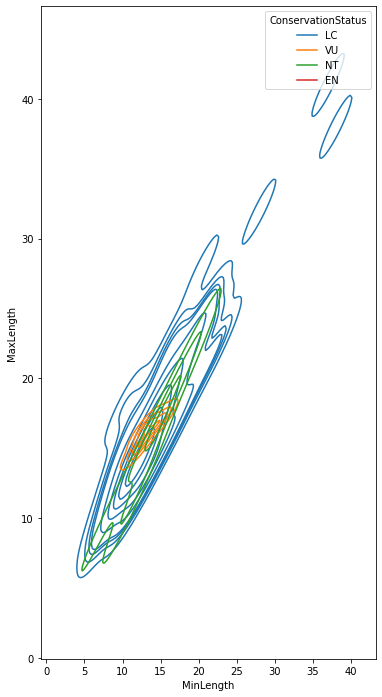

In [31]:
sns.kdeplot(data=filteredBirds, x="MinLength", y="MaxLength", hue="ConservationStatus")